# Comparing 2 Continuous Variables: Correlation

- Pearson's correlation coefficient or **Pearson's r** is the test statistic we get from a correlation test
- For discrete or non-normal data: Spearman's rank correlation
- Compares 2 continuous variables
- Unitless; tells us how much two variables tend to move together
- $H_0$: there is no linear relationship between the two variables

In [1]:
from math import sqrt

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('exam_scores.csv')
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


## Example Test

What's the relationship between exam score and hours studied?

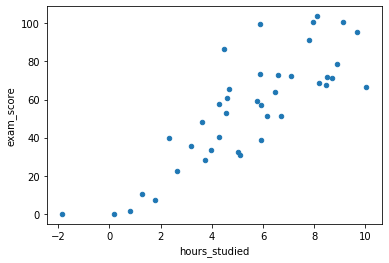

In [3]:
df.plot.scatter(y='exam_score', x='hours_studied')

Abbreviated Hypothesis Testing Procedure:

1. Setup
2. Calculate test statistic + p-value
3. Conclude

- $\alpha = .05$
- $H_0$: There is no linear relationship between exam score and number of hours studied.
- $H_a$: There is a linear relationship between exam score and number of hours studied.

In [4]:
x = df.hours_studied
y = df.exam_score

In [5]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.8351498542413307
p = 2.0762953315463046e-11


Conclusion: we reject the null hypothesis that there is no linear relationship between exam score and number of hours studied.

## Examples of Different Correlations

Text(0.5, 1.0, 'Perfect positive correlation, (r=1)')

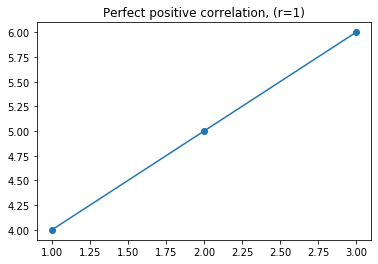

In [6]:
x = [1, 2, 3]
y = [4, 5, 6]

plt.plot(x, y, marker='o')
plt.title('Perfect positive correlation, (r=1)')

Text(0.5, 1.0, 'Perfect negative correlation (r=-1)')

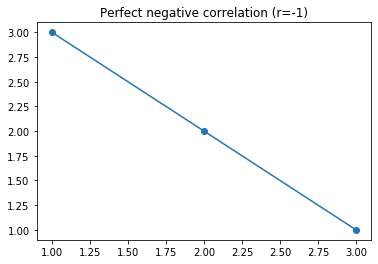

In [7]:
x = [3, 2, 1]
y = [1, 2, 3]

plt.plot(x, y, marker='o')
plt.title('Perfect negative correlation (r=-1)')

Text(0.5, 1.0, 'Absolutely no correlation (r=0)')

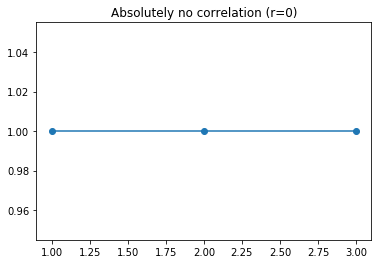

In [8]:
x = [1, 2, 3]
y = [1, 1, 1]

plt.plot(x, y, marker='o')
plt.title('Absolutely no correlation (r=0)')

p = 0.35156637389727036
r = -0.09413194814553733


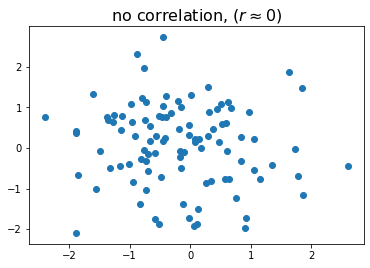

In [9]:
x = np.random.randn(100)
y = np.random.randn(100)

r, p = stats.pearsonr(x, y)

plt.scatter(x, y)
plt.title(r'no correlation, ($r \approx 0$)', size=16)
print('p =', p)
print('r =', r)

r = -0.7033832948782364
p = 3.354200655754199e-16


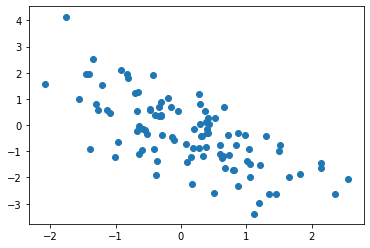

In [16]:
x = np.random.randn(100)
y = -x + (np.random.randn(100) * 1.1)

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

plt.scatter(x, y)

## Correlation "gotchas"

When looking at correlation, keep in mind:

1. [Correlation is not causation!](https://xkcd.com/552/)
2. This is just looking at a linear relationship
3. Correlation itself just looks 2 variables, there could be more going on
4. Correlation doesn't tell us how large the relationship is

### Example: non-linear relationship

r= -1.700029006457271e-16


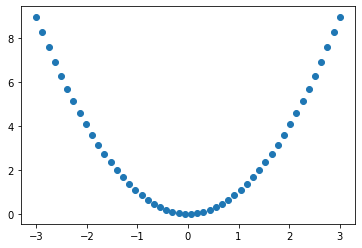

In [17]:
x = np.linspace(-3, 3)
y = x ** 2

r, p = stats.pearsonr(x, y)

plt.scatter(x, y)
print('r=', r)

### Example: confounding variable

r= -0.9937792168631225


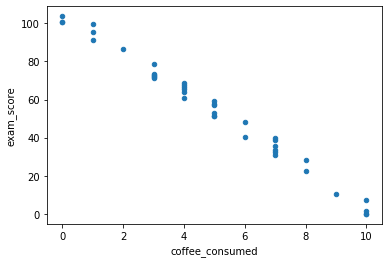

In [18]:
df.plot.scatter(y='exam_score', x='coffee_consumed')

r, p = stats.pearsonr(df.exam_score, df.coffee_consumed)
print('r=', r)

p= 4.915363906463736e-299
r= -0.9999999999999999


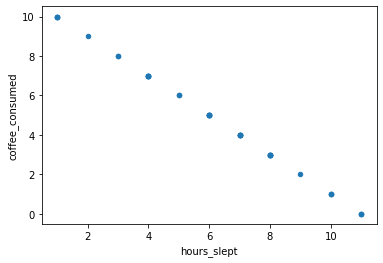

In [19]:
r, p = stats.pearsonr(df.coffee_consumed, df.hours_slept)
df.plot.scatter(y='coffee_consumed', x='hours_slept')
print('p=', p)
print('r=', r)

### Example: relationship magnitude

r= 1.0


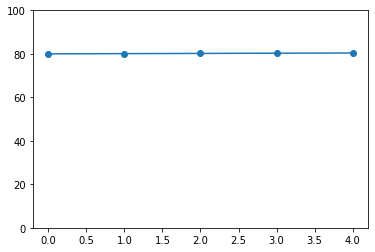

In [20]:
coffee_consumption = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]

r, p = stats.pearsonr(coffee_consumption, exam_score)

plt.plot(coffee_consumption, exam_score, marker='o')
plt.ylim(0, 100)
print('r=', r)

## Exercise Guidance

What does it mean to "control for"?

In [23]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


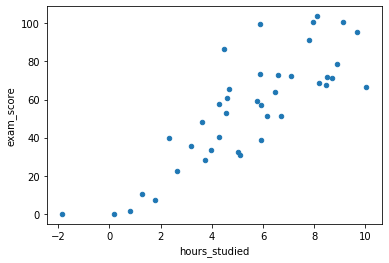

In [24]:
df.plot.scatter(y='exam_score', x='hours_studied')

In [25]:
import seaborn as sns

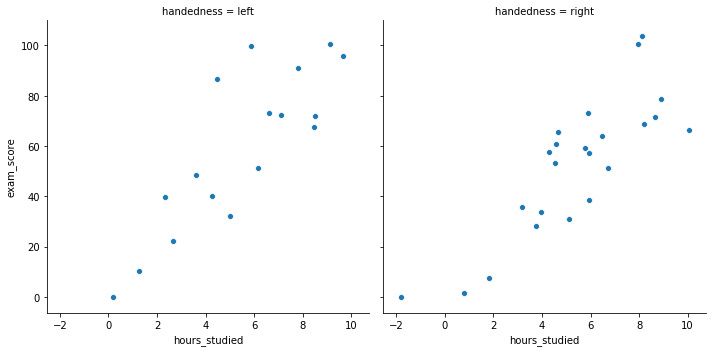

In [27]:
sns.relplot(data=df, y='exam_score', x='hours_studied', col='handedness')

In [29]:
lefties = df[df.handedness == 'left']
righties = df[df.handedness == 'right']

In [30]:
r, p = stats.pearsonr(lefties.exam_score, lefties.hours_studied)
print('Lefties')
print('  r =', r)
print('  p =', p)

Lefties
  r = 0.8389846518512477
  p = 2.5617236824813875e-05


In [31]:
r, p = stats.pearsonr(righties.exam_score, righties.hours_studied)
print('Righties')
print('  r =', r)
print('  p =', p)

Righties
  r = 0.8407115600383273
  p = 5.114047317102283e-07
